In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Top_12_German_Companies_Financial_Data.csv')

In [5]:
df.head()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity
0,Volkswagen AG,3/31/2017,19695988685,1.329398e+09,24520605687,58120450678,33599844991,2.287315,3.956559,0.729783
1,Volkswagen AG,6/30/2017,7201825633,7.220810e+08,27556950386,53860356064,26303405678,1.340654,2.745200,1.047657
2,Volkswagen AG,9/30/2017,15706422457,2.263166e+09,11556351337,26096752248,14540400911,8.672214,15.564676,0.794775
3,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,0.942176,1.542628,0.637304
4,Volkswagen AG,3/31/2018,15989256775,1.291419e+09,42659096630,53863933584,11204836955,2.397558,11.525549,3.807204


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         384 non-null    object 
 1   Period          384 non-null    object 
 2   Revenue         384 non-null    int64  
 3   Net Income      384 non-null    float64
 4   Liabilities     384 non-null    int64  
 5   Assets          384 non-null    int64  
 6   Equity          384 non-null    int64  
 7   ROA (%)         384 non-null    float64
 8   ROE (%)         384 non-null    float64
 9   Debt to Equity  384 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 30.1+ KB


In [9]:
df['Period'] = pd.to_datetime(df['Period'], format='%m/%d/%Y')
df['Year'] = df['Period'].dt.year

## EDA

In [12]:
df.describe().T.iloc[1:,1:]

,mean,min,25%,50%,75%,max,std
Revenue,12709920012.414062,5149849693.0,9315160969.25,12669631607.5,16217235280.5,19909637251.0,4095183011.508822
Net Income,1249025113.673698,298030924.1,864381347.1,1145475814.5,1560234392.0,2884007106.0,544544128.563978
Liabilities,31155787345.859375,10046371516.0,20851735943.75,32306589588.0,40889421725.0,49769403556.0,11395383744.976673
Assets,61416239682.148438,21773242219.0,50740129341.5,60207151100.5,73690748235.75,96574017987.0,16989219905.667023
Equity,30260452336.309895,10017618918.0,19668125650.25,29990626859.0,39846459661.5,49918115168.0,11728030365.48505
ROA (%),2.260345,0.501102,1.310458,1.902219,2.850194,9.156052,1.406047
ROE (%),4.992758,0.98048,2.596827,4.004204,6.273825,21.119173,3.40137
Debt to Equity,1.23558,0.219663,0.732095,1.034642,1.512128,4.631348,0.781592
Year,2020.5,2017.0,2018.75,2020.5,2022.25,2024.0,2.294277


In [14]:
high_range = ['Revenue', 'Liabilities', 'Assets',
       'Equity']
middle_range = [ 'Net Income']
low_range = ['ROA (%)', 'ROE (%)', 'Debt to Equity']

df_17_20 = df[df['Period'] < '2020-12-31']

df_21_24 = df[df['Period'] > '2020-12-31']

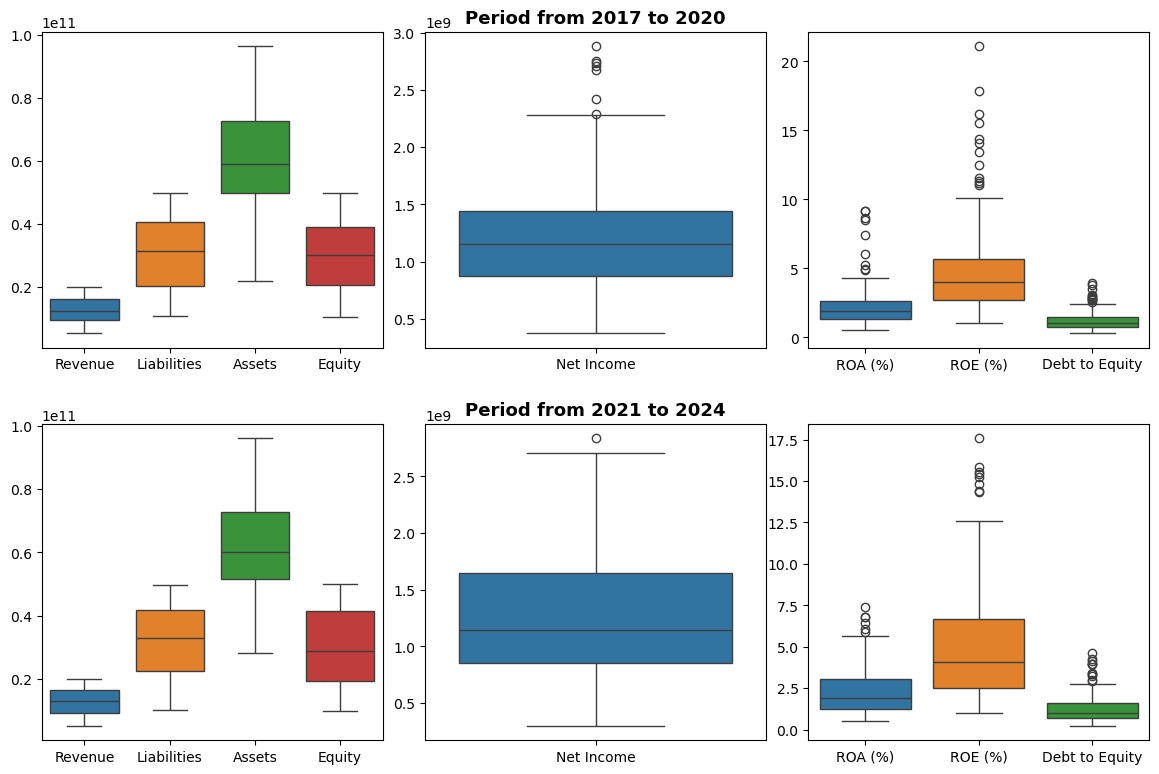

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

#fig.text(0.5, 0.99, 'Period from 2017 to 2020', ha='center', fontsize=13, fontweight='bold')
axes[0,1].set_title('Period from 2017 to 2020', ha='center', fontsize=13, fontweight='bold')

sns.boxplot(df_17_20[high_range], ax=axes[0,0])

sns.boxplot(df_17_20[middle_range], ax=axes[0,1])

sns.boxplot(df_17_20[low_range], ax=axes[0,2])

#fig.text(0.5, 0.49, 'Period from 2021 to 2024', ha='center', fontsize=13, fontweight='bold')
axes[1,1].set_title('Period from 2021 to 2024', ha='center', fontsize=13, fontweight='bold')

sns.boxplot(df_21_24[high_range], ax=axes[1,0])

sns.boxplot(df_21_24[middle_range], ax=axes[1,1])

sns.boxplot(df_21_24[low_range], ax=axes[1,2])

#plt.suptitle('VARIABLES BOXPLOTS PER RANGE')
plt.subplots_adjust(top=0.88, hspace=4.5, wspace=2.5)
plt.tight_layout()
#plt.xticks()
plt.show()

**Boxplot Analysis and Outlier Detection**  

The boxplots highlight key metrics and the range of numerical variables across quarters over the past seven years, providing a graphical representation of data distribution. Each boxplot displays the median (central line), the first and third quartiles (which define the box), and the extreme values, with some points indicating outliers relative to the overall distribution.

A closer look at the two periods, 2017-2020 and 2021-2024, reveals that the first had wider ranges in terms of Net Income, ROA, and ROE, with significantly more quarters of exceptionally strong performance. In general, the analysis highlights considerable variability in corporate performance by quarter, with some companies showing values that deviate significantly from the average.

1. Net Income: Some companies report exceptionally high profits, as seen in the elevated values beyond the upper whisker.  
2. ROA and ROE: The presence of outliers suggests that certain companies achieved returns far above the industry average, indicating specific strategies or unique financial conditions.  
3. Debt to Equity: The dispersion suggests that some companies have a high level of debt compared to equity, while others follow more conservative financial policies.

These outliers could be the result of extraordinary events (mergers, corporate crises, market booms) or differentiated financial strategies.

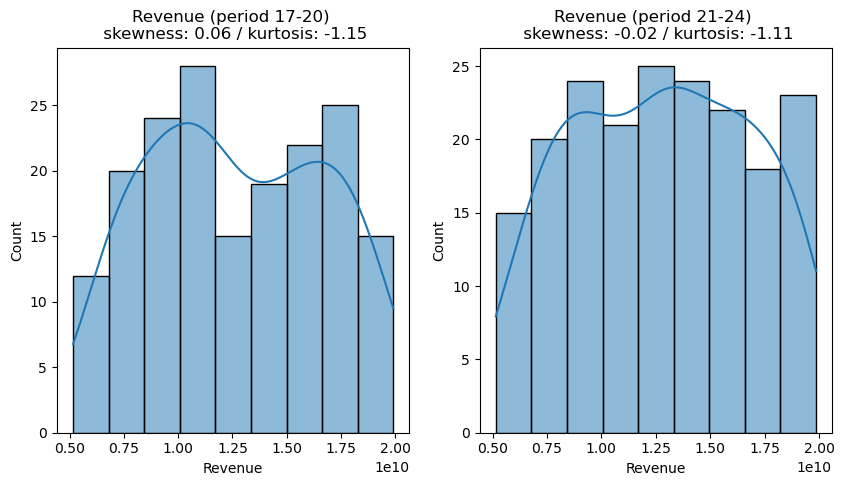

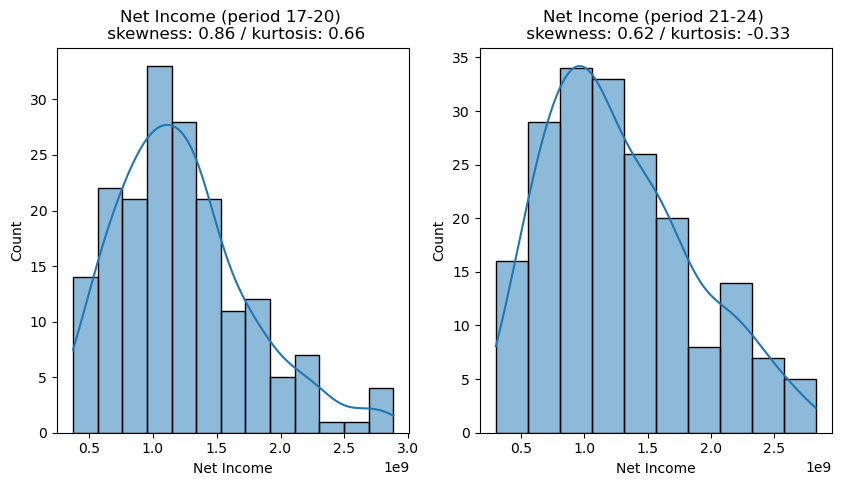

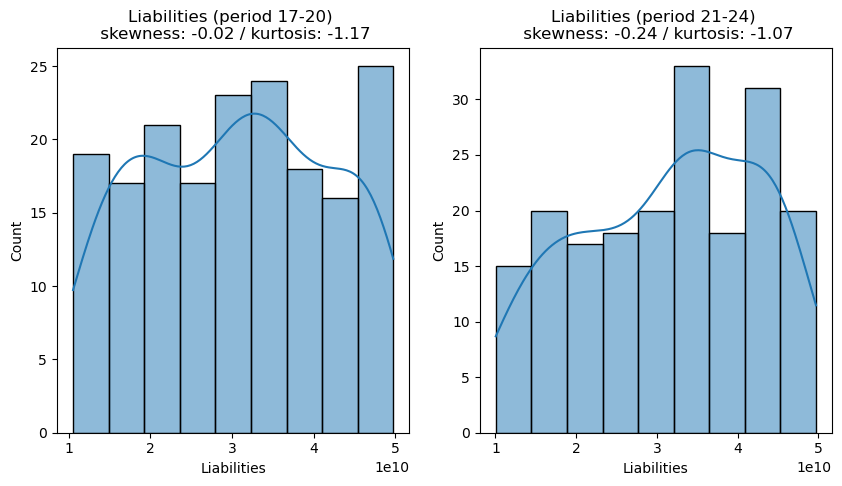

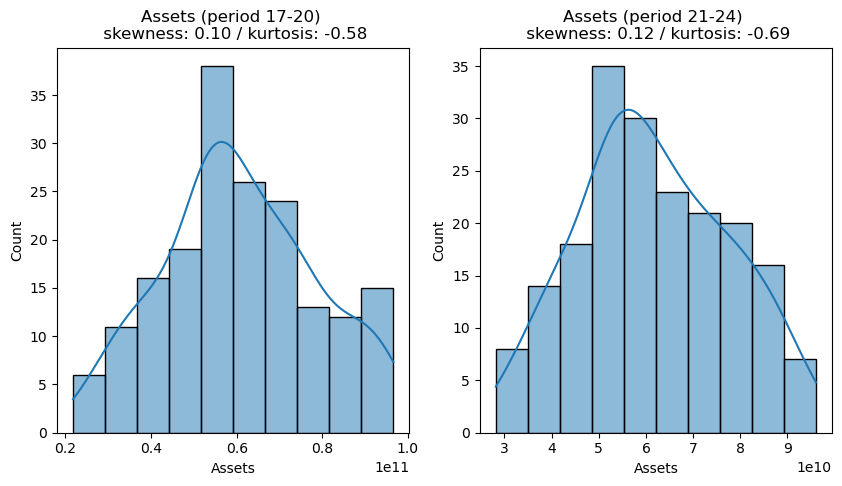

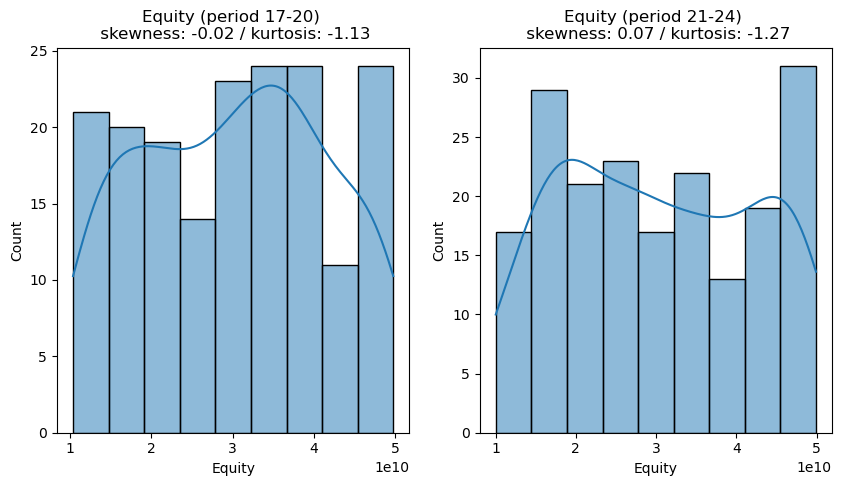

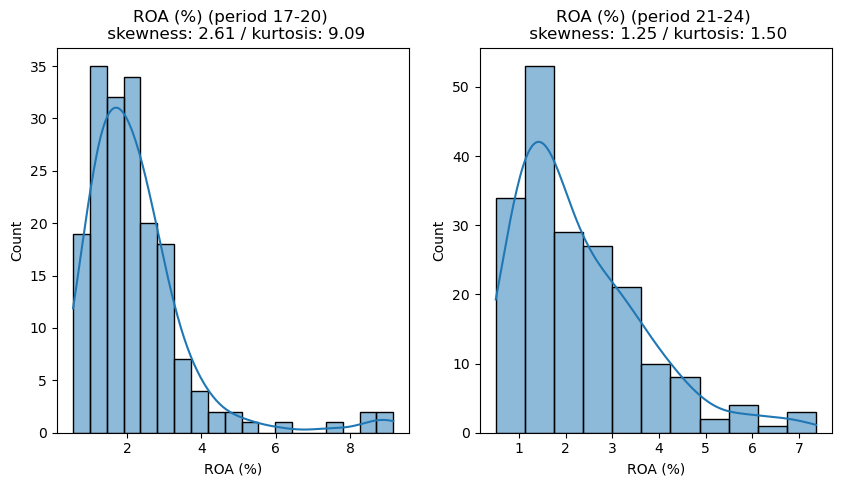

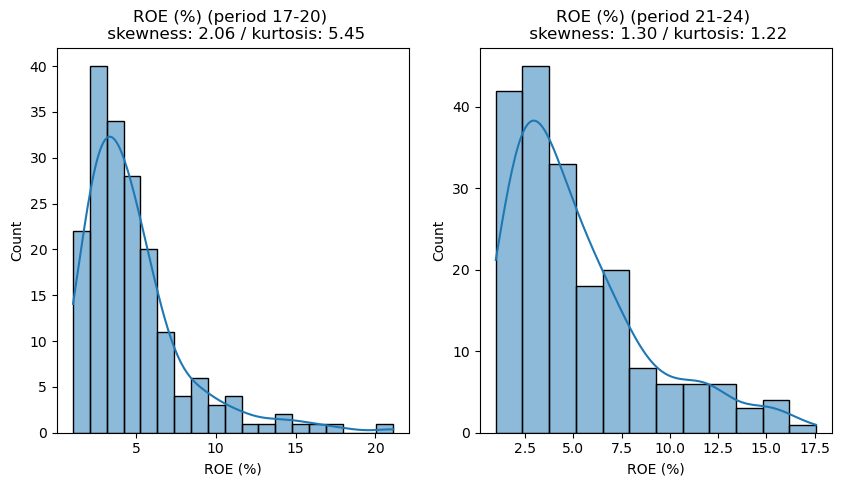

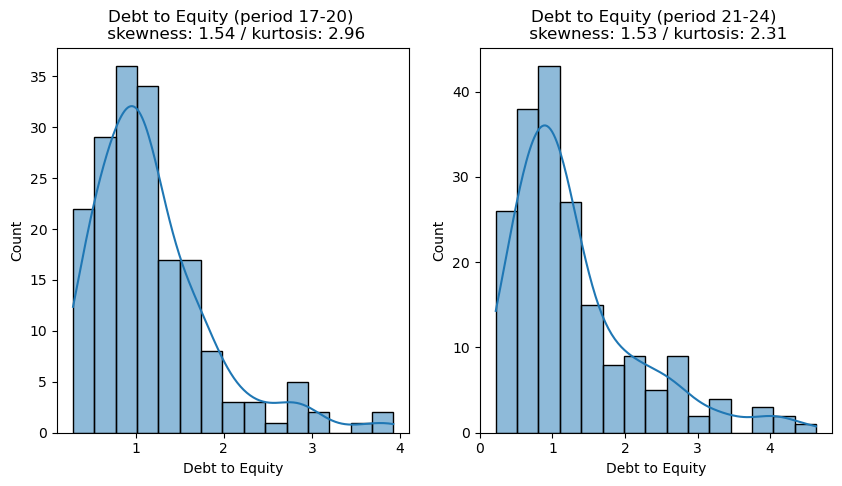

In [18]:
for var in df.iloc[:, 2:-1].columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    #sns.boxplot(df_17_20[high_range], ax=axes[0,0])
    sns.histplot(df_17_20, x=var, kde=True, ax=axes[0])
    axes[0].set_title(f'{var} (period 17-20) \n skewness: {df_17_20[var].skew():.2f} / kurtosis: {df_17_20[var].kurtosis():.2f}')
    sns.histplot(df_21_24, x=var, kde=True, ax=axes[1])
    axes[1].set_title(f'{var} (period 21-24) \n skewness: {df_21_24[var].skew():.2f} / kurtosis: {df_21_24[var].kurtosis():.2f}')
    #plt.title(f'{var} skewness: {df[var].skew():.2f} - kurtosis: {df[var].kurtosis():.2f}')
    plt.show()

**Hiostograms and distribution metrics**  
Histograms display data distribution by grouping values into bins and counting occurrences in each. Their shape helps identify normality and outliers.  

Skewness measures asymmetry:  
S = 0 → Normal distribution  
S < 0 → Left-skewed (longer tail on the left)  
S > 0 → Right-skewed (longer tail on the right)

Kurtosis quantifies tail extremity relative to a normal distribution:  
K = 0 → Normal distribution (mesokurtic)  
K < 0 → Flatter distribution (platykurtic), lighter tails than normal  
K > 0 → Peaked distribution (leptokurtic), heavier tails than normal  

This analysis helps assess data behavior and deviations from normality.

In [27]:
for var in df.iloc[:, 2:-1].columns:
    print(f'{var}')
    print(f'[period 17-20] skewness: {df_17_20[var].skew():.2f} / kurtosis: {df_17_20[var].kurtosis():.2f}')
    print(f'[period 21-24] skewness: {df_21_24[var].skew():.2f} / kurtosis: {df_21_24[var].kurtosis():.2f}')

Revenue
[period 17-20] skewness: 0.06 / kurtosis: -1.15
[period 21-24] skewness: -0.02 / kurtosis: -1.11
Net Income
[period 17-20] skewness: 0.86 / kurtosis: 0.66
[period 21-24] skewness: 0.62 / kurtosis: -0.33
Liabilities
[period 17-20] skewness: -0.02 / kurtosis: -1.17
[period 21-24] skewness: -0.24 / kurtosis: -1.07
Assets
[period 17-20] skewness: 0.10 / kurtosis: -0.58
[period 21-24] skewness: 0.12 / kurtosis: -0.69
Equity
[period 17-20] skewness: -0.02 / kurtosis: -1.13
[period 21-24] skewness: 0.07 / kurtosis: -1.27
ROA (%)
[period 17-20] skewness: 2.61 / kurtosis: 9.09
[period 21-24] skewness: 1.25 / kurtosis: 1.50
ROE (%)
[period 17-20] skewness: 2.06 / kurtosis: 5.45
[period 21-24] skewness: 1.30 / kurtosis: 1.22
Debt to Equity
[period 17-20] skewness: 1.54 / kurtosis: 2.96
[period 21-24] skewness: 1.53 / kurtosis: 2.31


The distribution analysis reveals distinct patterns across financial metrics:  

1. Revenue, Liabilities, Assets, and Equity show near-zero skewness and negative kurtosis, indicating approximately symmetric distributions with lighter tails (fewer extreme values).  
2. Net Income has moderate positive skewness and low kurtosis, suggesting a slight right-tail bias but no extreme outliers.  
3. ROA and ROE exhibit high positive skewness and kurtosis in 17-20, indicating a strong rightward asymmetry with heavy tails (presence of extreme values). In 21-24, the skewness and kurtosis decrease, showing a more balanced distribution.
4. Debt to Equity is consistently right-skewed with moderate kurtosis, suggesting a tendency toward higher leverage in some companies but without excessive outliers.
   
Overall, profitability ratios (ROA, ROE) show greater variability and extreme values, while balance sheet metrics (Revenue, Assets, Equity) tend to be more stable and normally distributed.

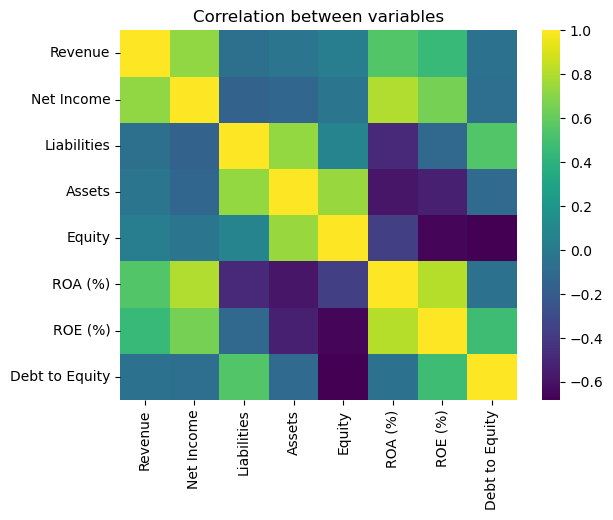

In [47]:
sns.heatmap(df.corr(numeric_only=True),cmap='viridis')
plt.title('Correlation between variables')
plt.show()

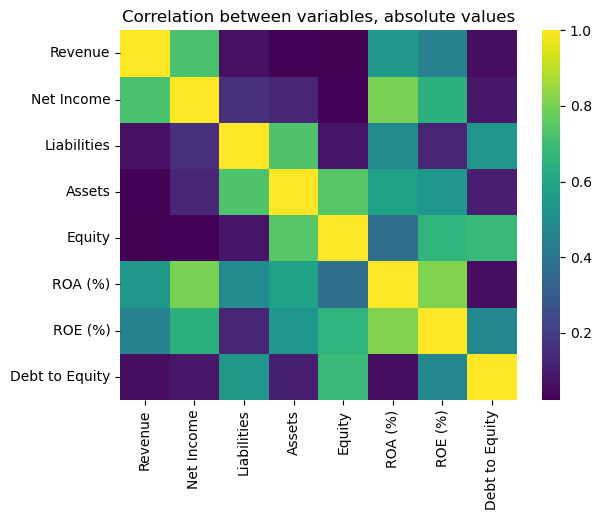

In [45]:
sns.heatmap(np.abs(df.corr(numeric_only=True)),cmap='viridis')
plt.title('Correlation between variables, absolute values')
plt.show()

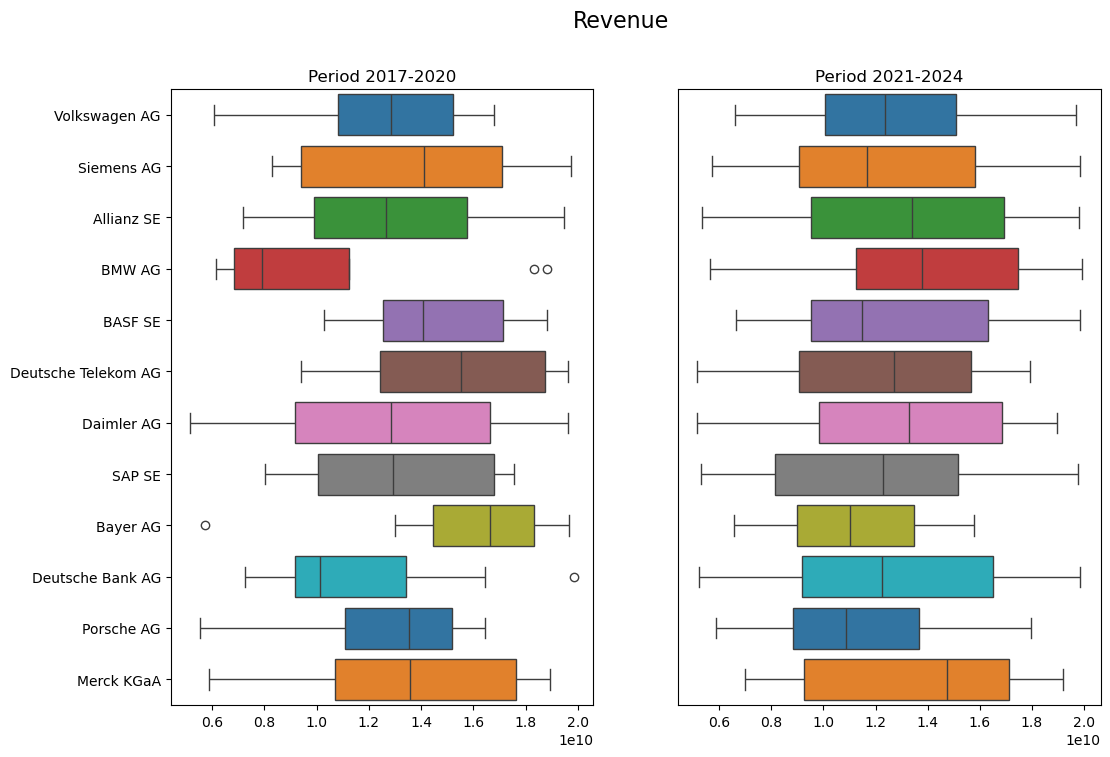

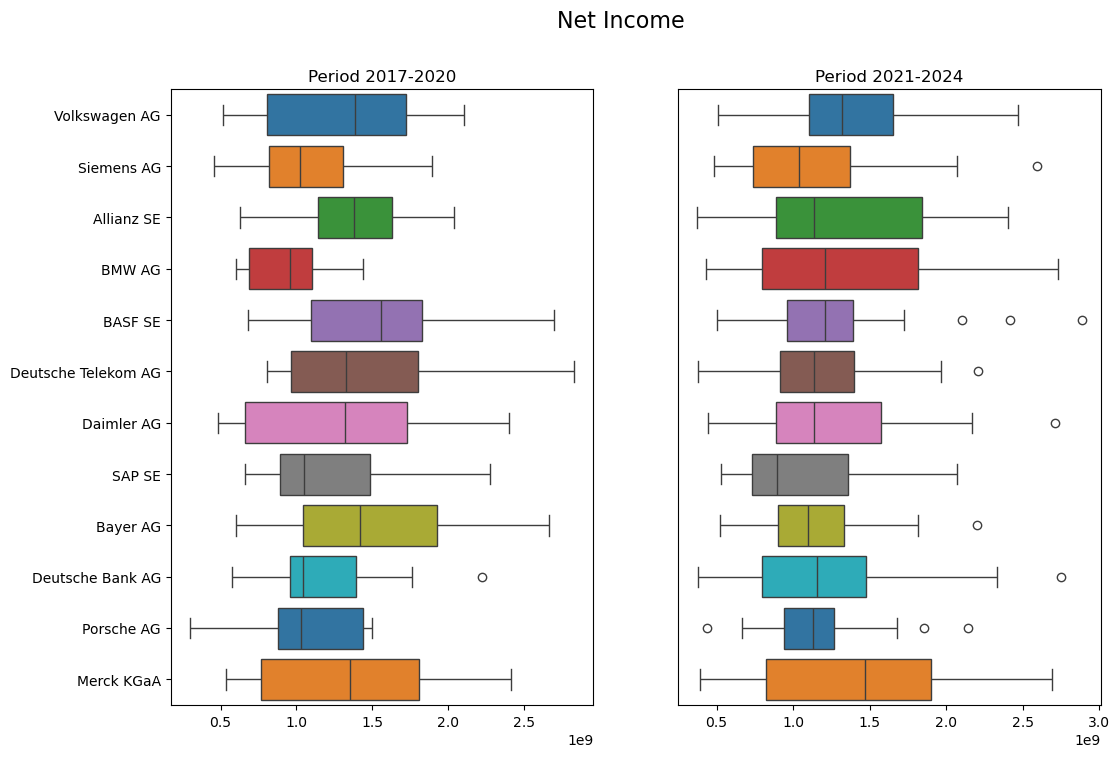

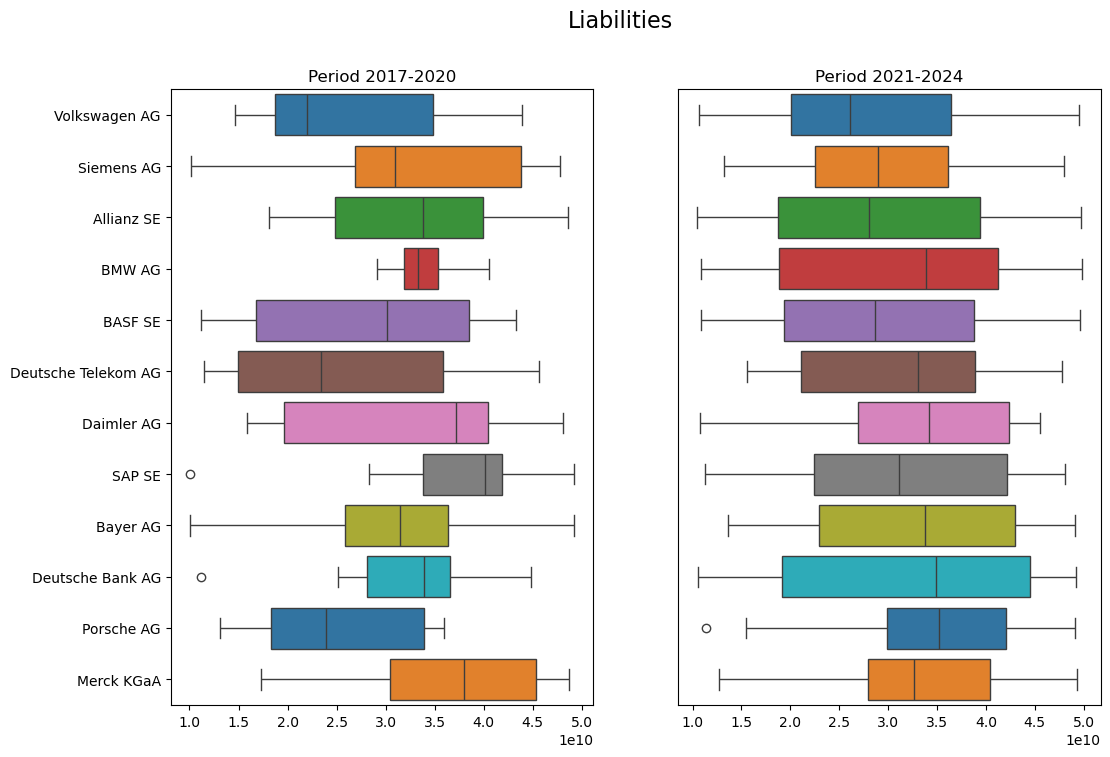

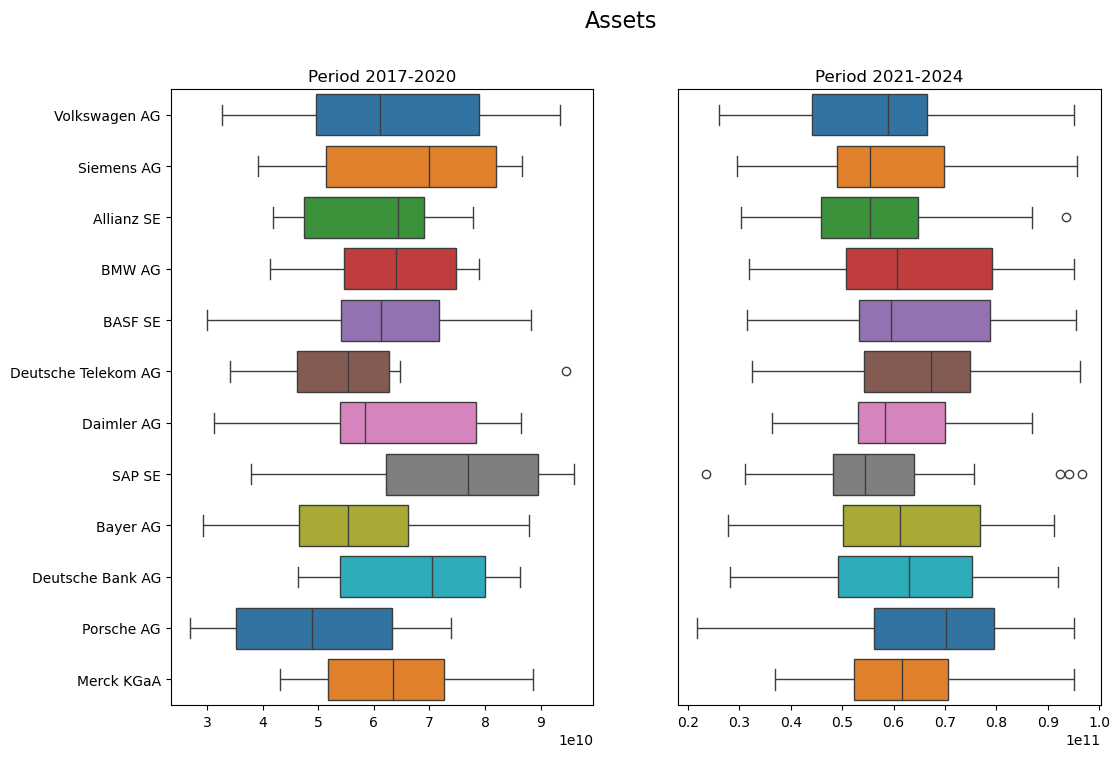

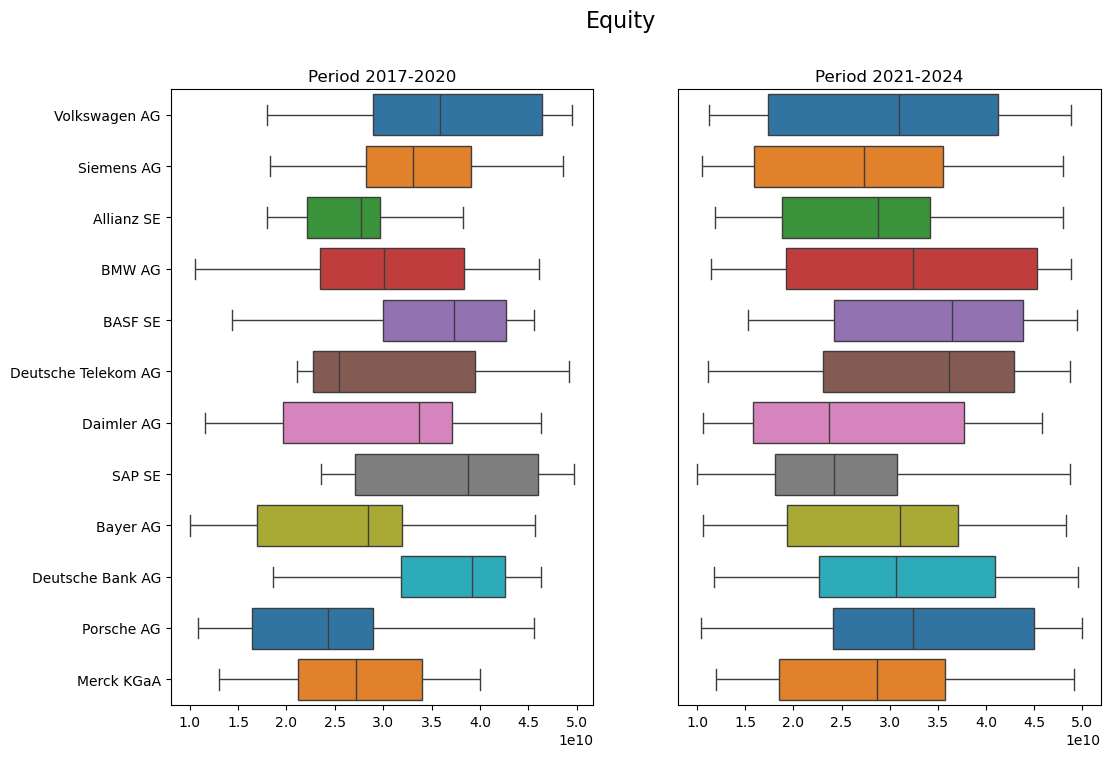

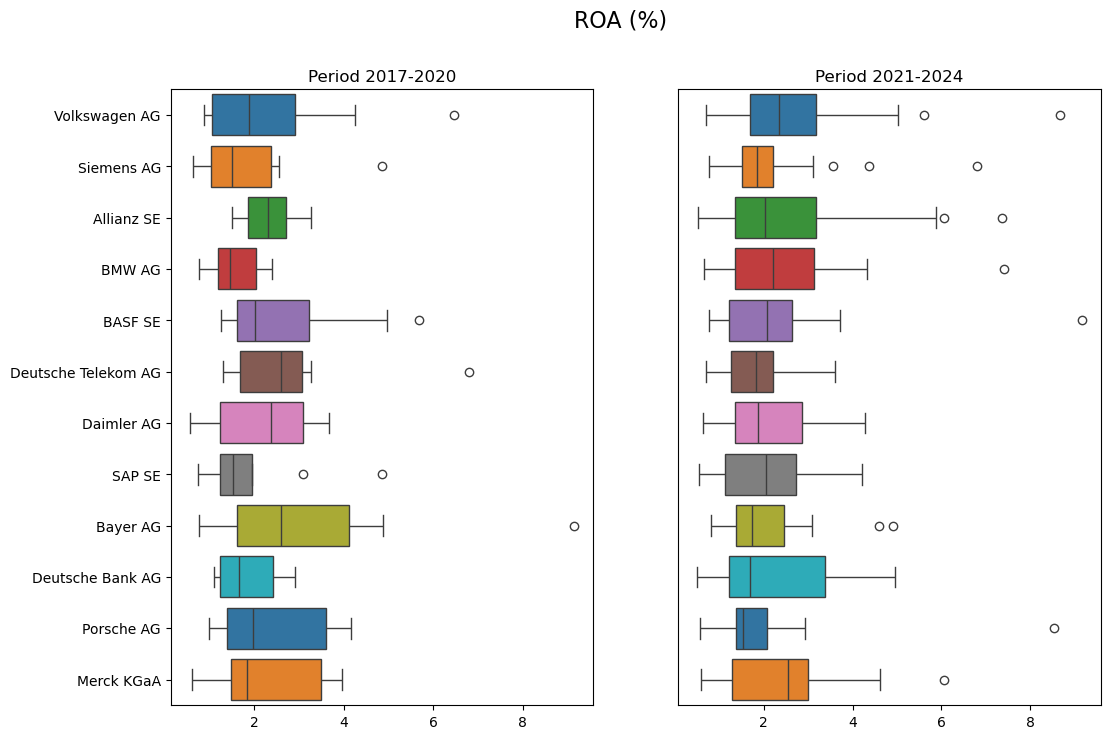

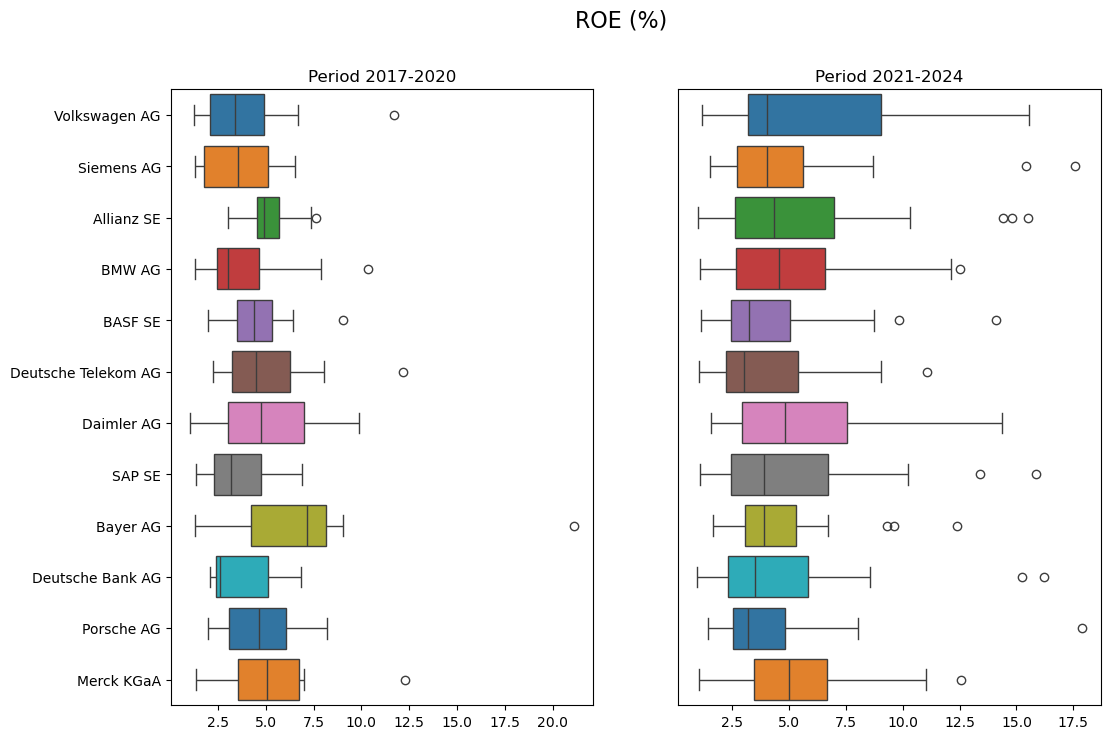

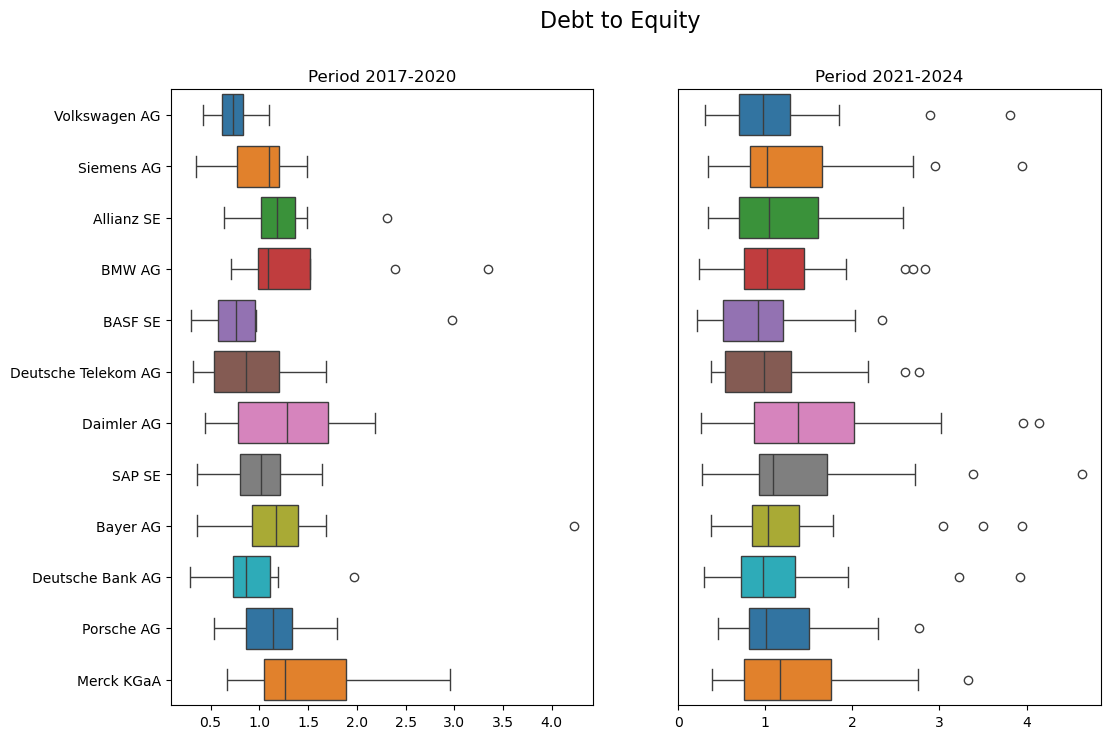

In [178]:
for var in df.iloc[:, 2:-1].columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
    sns.boxplot(df_17_20, x=var, y='Company', hue='Company', palette='tab10', ax=axes[0])
    sns.boxplot(df_21_24, x=var, y='Company', hue='Company', palette='tab10', ax=axes[1])
    axes[1].yaxis.set_visible(False)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[1].set_xlabel('')
    axes[0].set_title('Period 2017-2020')
    axes[1].set_title('Period 2021-2024')
    fig.suptitle(f"{var}",fontsize=16)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


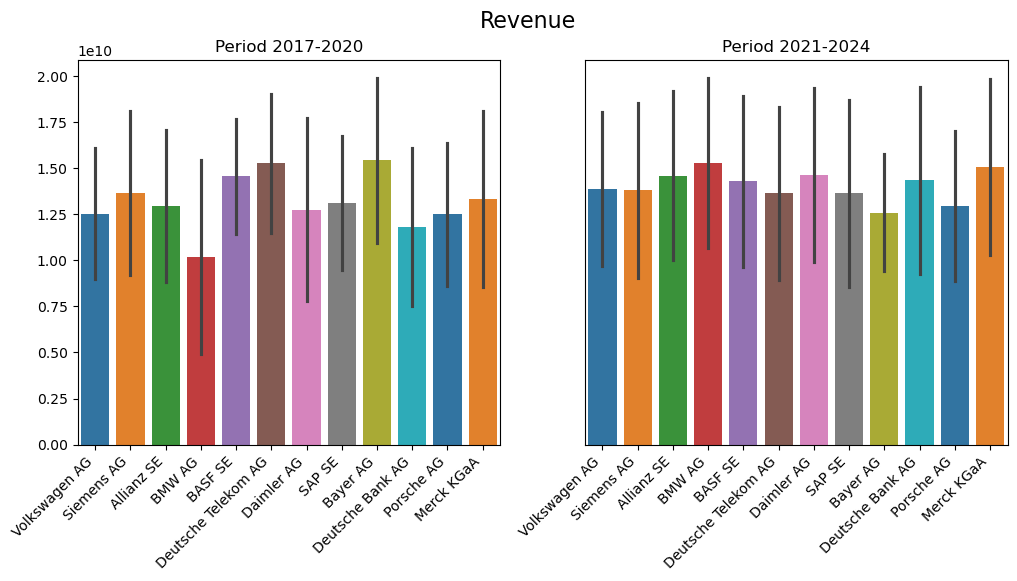

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


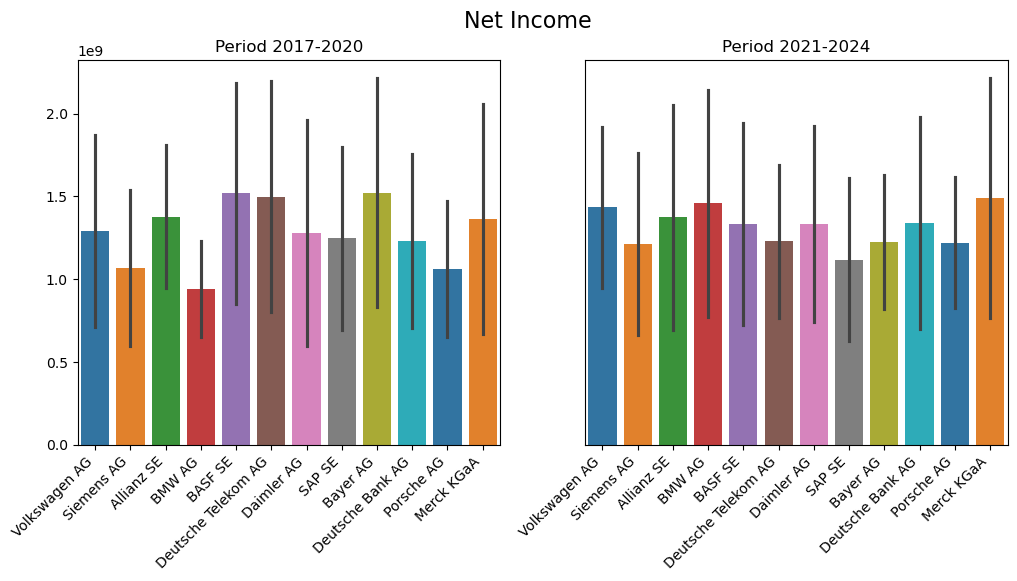

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


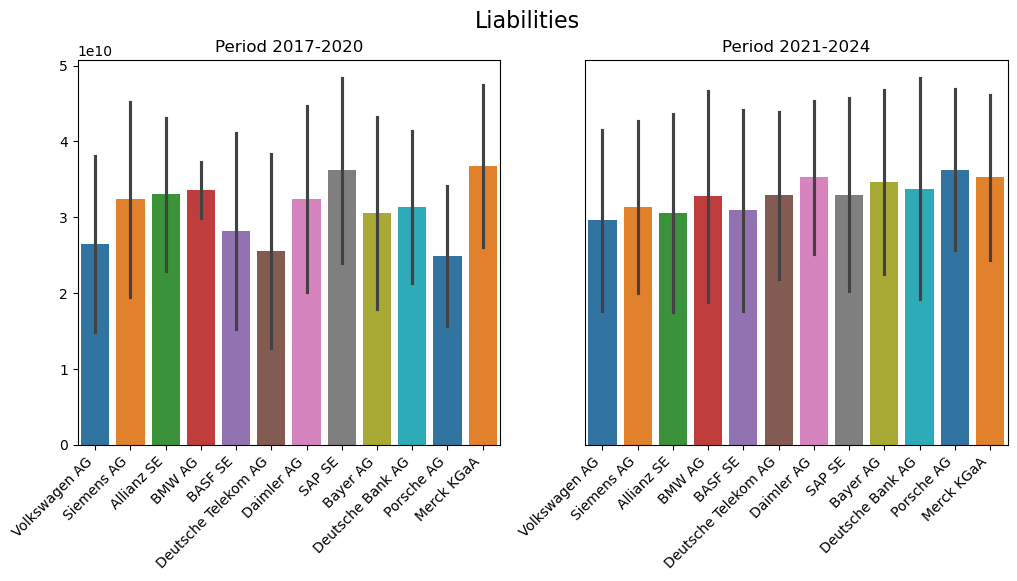

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


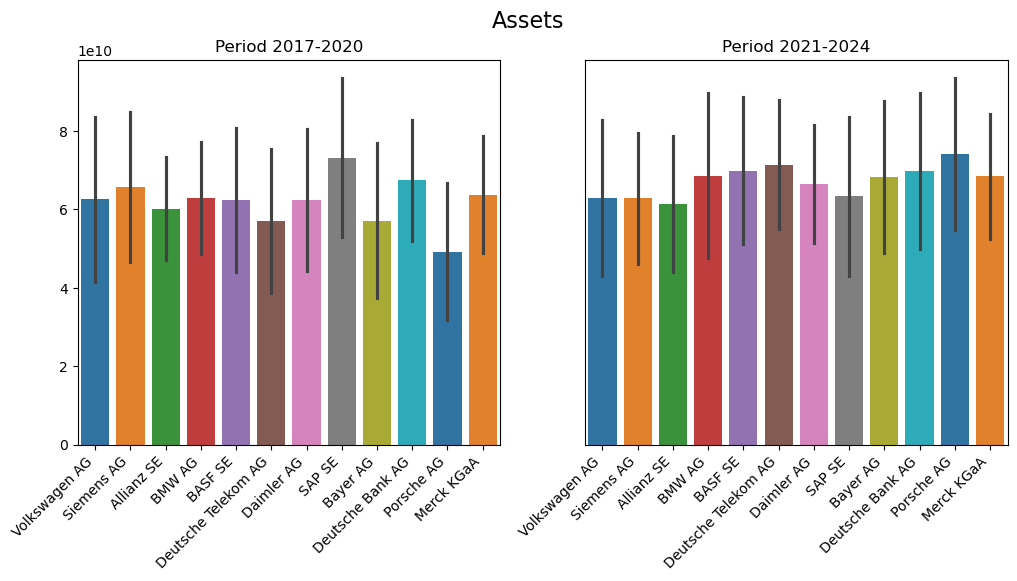

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


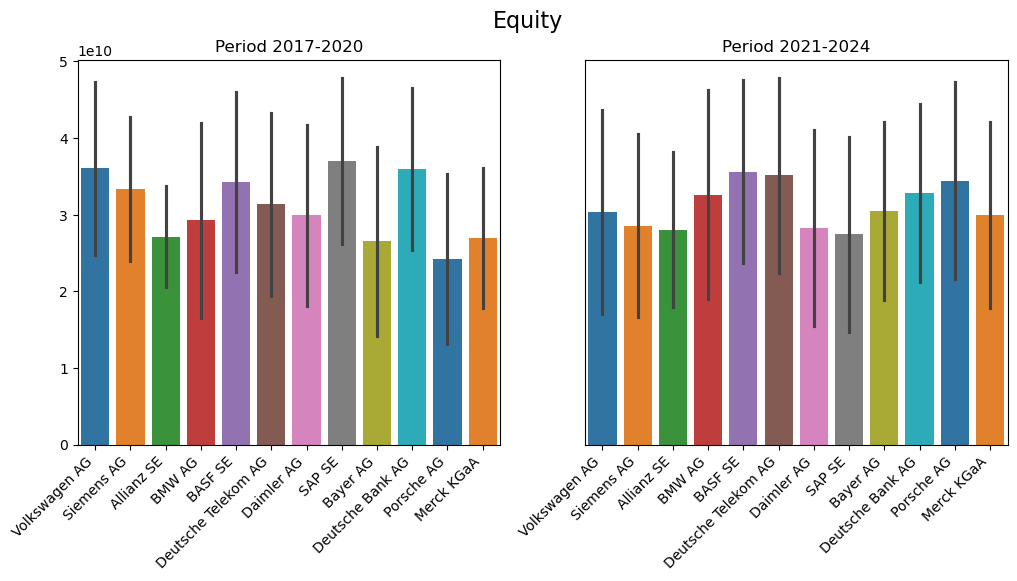

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


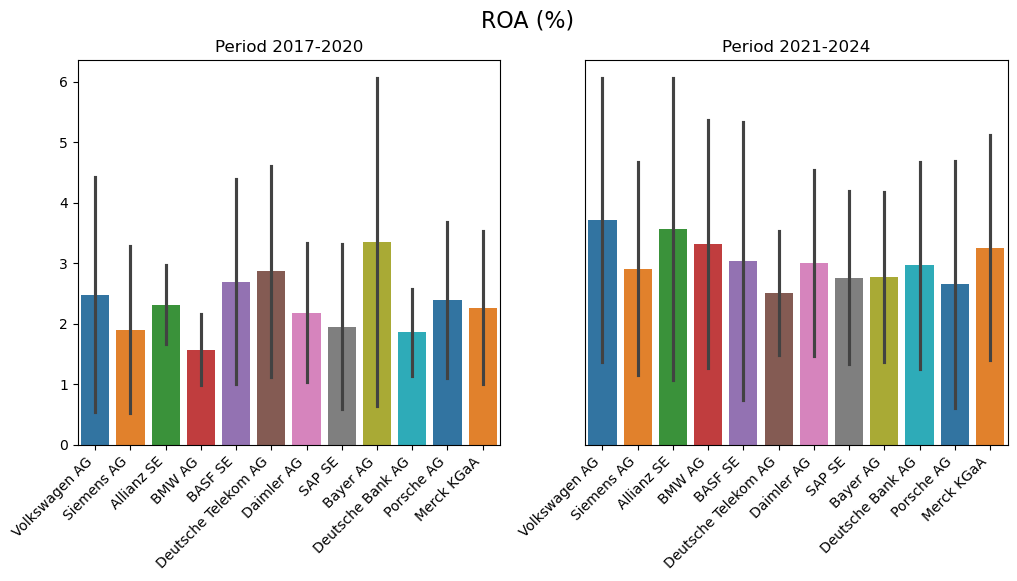

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


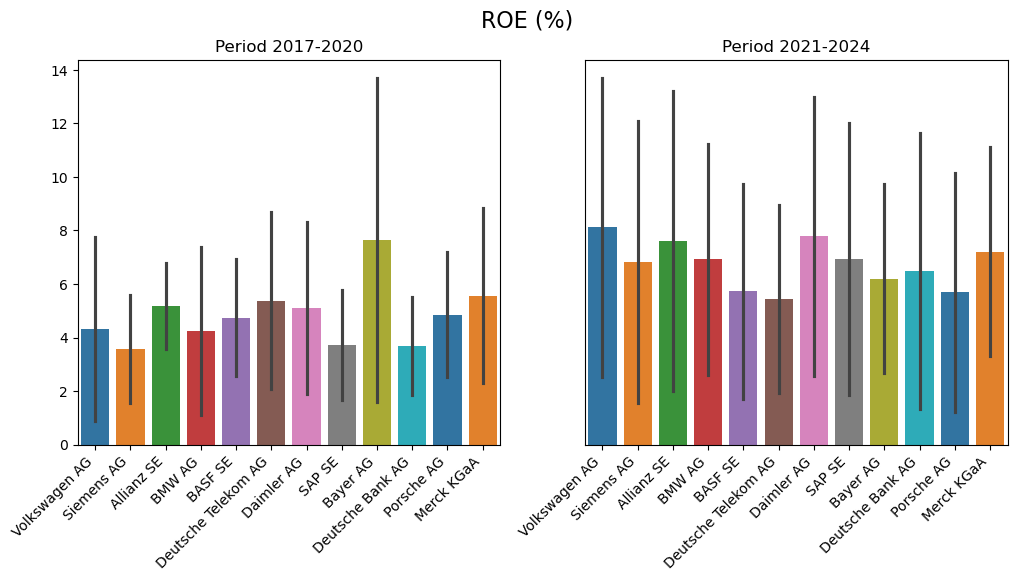

C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_71632\3156737550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


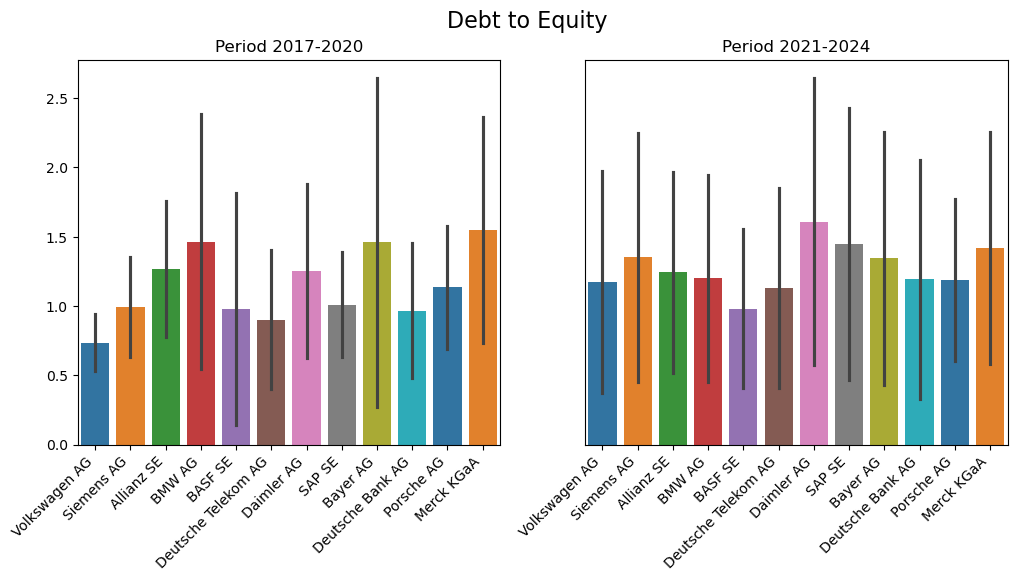

In [206]:
for var in df.iloc[:, 2:-1].columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    sns.barplot(x='Company',y=var,data=df_17_20,estimator=np.mean, errorbar='sd' ,hue='Company', ax=axes[0], palette='tab10')
    sns.barplot(x='Company',y=var,data=df_21_24,estimator=np.mean, errorbar='sd' ,hue='Company', ax=axes[1], palette='tab10')
    axes[1].yaxis.set_visible(False)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[1].set_xlabel('')
    axes[0].set_title('Period 2017-2020')
    axes[1].set_title('Period 2021-2024')
    fig.suptitle(f"{var}",fontsize=16)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    plt.show()

**Scrivi qualcosa sulle statistiche**

In [259]:
company_df_21_24 = df_21_24.groupby('Company')[high_range+middle_range+low_range].describe().loc[:, (slice(None), ['mean', 'std'])].T
company_df_17_20 = df_17_20.groupby('Company')[high_range+middle_range+low_range].describe().loc[:, (slice(None), ['mean', 'std'])].T

In [261]:
def format_large_numbers(x):
    if x >= 1_000_000_000: 
        return f"{x / 1_000_000_000:.3f} b"
    elif x >= 1_000_000: 
        return f"{x / 1_000_000:.3f} m"
    elif x >= 1_000: 
        return f"{x / 1_000:.3f} k"
    else:  
        return f"{x:.3f}"

In [265]:
for col in company_df_17_20.columns: 
    company_df_17_20[col] = company_df_17_20[col].apply(format_large_numbers)

company_df_17_20

Company             Allianz SE    BASF SE     BMW AG   Bayer AG Daimler AG  \
Revenue        mean   12.928 b   14.551 b   10.186 b   15.423 b   12.747 b   
               std     4.118 b    3.099 b    5.252 b    4.468 b    4.980 b   
Liabilities    mean   32.991 b   28.129 b   33.614 b   30.550 b   32.408 b   
               std    10.150 b   12.927 b    3.667 b   12.678 b   12.228 b   
Assets         mean   60.132 b   62.369 b   62.902 b   57.047 b   62.305 b   
               std    13.074 b   18.311 b   14.208 b   19.800 b   18.158 b   
Equity         mean   27.141 b   34.240 b   29.287 b   26.497 b   29.897 b   
               std     6.644 b   11.747 b   12.727 b   12.339 b   11.830 b   
Net Income     mean    1.377 b    1.518 b  940.958 m    1.522 b    1.279 b   
               std   430.879 m  667.795 m  288.784 m  693.399 m  684.400 m   
ROA (%)        mean      2.308      2.695      1.572      3.348      2.181   
               std       0.652      1.694      0.595      2.712      1.147   
ROE (%)        mean      5.172      4.736      4.244      7.642      5.100   
               std       1.616      2.181      3.156      6.056      3.221   
Debt to Equity mean      1.268      0.978      1.465      1.459      1.254   
               std       0.491      0.838      0.918      1.186      0.627   

Company             Deutsche Bank AG Deutsche Telekom AG Merck KGaA  \
Revenue        mean         11.792 b            15.261 b   13.331 b   
               std           4.285 b             3.777 b    4.781 b   
Liabilities    mean         31.397 b            25.573 b   36.780 b   
               std          10.025 b            12.782 b   10.653 b   
Assets         mean         67.320 b            56.925 b   63.726 b   
               std          15.426 b            18.338 b   14.962 b   
Equity         mean         35.924 b            31.351 b   26.946 b   
               std          10.557 b            11.950 b    9.176 b   
Net Income     mean          1.229 b             1.498 b    1.364 b   
               std         525.437 m           696.853 m  694.462 m   
ROA (%)        mean            1.854               2.863      2.265   
               std             0.723               1.747      1.258   
ROE (%)        mean            3.678               5.379      5.559   
               std             1.840               3.308      3.273   
Debt to Equity mean            0.967               0.902      1.549   
               std             0.489               0.500      0.814   

Company             Porsche AG     SAP SE Siemens AG Volkswagen AG  
Revenue        mean   12.494 b   13.115 b   13.627 b      12.511 b  
               std     3.867 b    3.648 b    4.449 b       3.552 b  
Liabilities    mean   24.899 b   36.156 b   32.336 b      26.478 b  
               std     9.271 b   12.207 b   12.818 b      11.639 b  
Assets         mean   49.155 b   73.156 b   65.673 b      62.532 b  
               std    17.461 b   20.306 b   19.151 b      21.055 b  
Equity         mean   24.255 b   37.000 b   33.338 b      36.054 b  
               std    11.086 b   10.829 b    9.429 b      11.300 b  
Net Income     mean    1.063 b    1.245 b    1.068 b       1.292 b  
               std   410.644 m  554.013 m  470.684 m     581.264 m  
ROA (%)        mean      2.387      1.948      1.898         2.480  
               std       1.284      1.362      1.378         1.947  
ROE (%)        mean      4.860      3.718      3.581         4.317  
               std       2.337      2.063      2.016         3.447  
Debt to Equity mean      1.135      1.009      0.993         0.736  
               std       0.443      0.379      0.362         0.206

In [263]:
for col in company_df_21_24.columns: 
    company_df_21_24[col] = company_df_21_24[col].apply(format_large_numbers)

company_df_21_24

Company             Allianz SE    BASF SE     BMW AG   Bayer AG Daimler AG  \
Revenue        mean   13.045 b   12.759 b   13.663 b   11.232 b   13.062 b   
               std     4.092 b    4.160 b    4.112 b    2.833 b    4.205 b   
Liabilities    mean   28.906 b   29.222 b   30.983 b   32.760 b   33.345 b   
               std    12.381 b   12.513 b   13.130 b   11.509 b    9.590 b   
Assets         mean   55.918 b   63.548 b   62.421 b   62.129 b   60.598 b   
               std    15.810 b   17.090 b   19.122 b   17.641 b   13.686 b   
Equity         mean   27.012 b   34.326 b   31.437 b   29.370 b   27.254 b   
               std     9.740 b   11.504 b   13.114 b   11.221 b   12.340 b   
Net Income     mean    1.294 b    1.258 b    1.372 b    1.152 b    1.257 b   
               std   641.223 m  575.050 m  644.011 m  381.127 m  556.194 m   
ROA (%)        mean      2.626      2.241      2.449      2.046      2.214   
               std       1.844      1.696      1.514      1.032      1.134   
ROE (%)        mean      5.690      4.284      5.182      4.641      5.824   
               std       4.186      3.000      3.223      2.636      3.892   
Debt to Equity mean      1.236      0.976      1.195      1.336      1.600   
               std       0.719      0.570      0.743      0.909      1.032   

Company             Deutsche Bank AG Deutsche Telekom AG Merck KGaA  \
Revenue        mean         12.806 b            12.178 b   13.463 b   
               std           4.538 b             4.209 b    4.256 b   
Liabilities    mean         31.940 b            31.104 b   33.357 b   
               std          13.810 b            10.430 b   10.281 b   
Assets         mean         63.540 b            64.983 b   62.240 b   
               std          18.039 b            14.925 b   14.567 b   
Equity         mean         31.600 b            33.879 b   28.883 b   
               std          11.204 b            12.235 b   11.702 b   
Net Income     mean          1.263 b             1.157 b    1.405 b   
               std         602.451 m           435.352 m  681.694 m   
ROA (%)        mean            2.188               1.851      2.403   
               std             1.265               0.760      1.371   
ROE (%)        mean            4.853               4.075      5.393   
               std             3.858               2.624      2.913   
Debt to Equity mean            1.188               1.124      1.408   
               std             0.857               0.716      0.833   

Company             Porsche AG     SAP SE Siemens AG Volkswagen AG  
Revenue        mean   11.571 b   12.184 b   12.341 b      12.401 b  
               std     3.622 b    4.526 b    4.241 b       3.720 b  
Liabilities    mean   34.279 b   31.170 b   29.690 b      27.967 b  
               std    10.047 b   12.027 b   10.727 b      11.246 b  
Assets         mean   67.486 b   57.607 b   57.196 b      57.246 b  
               std    17.631 b   18.455 b   15.235 b      18.146 b  
Equity         mean   33.207 b   26.437 b   27.506 b      29.279 b  
               std    12.434 b   12.236 b   11.518 b      12.832 b  
Net Income     mean    1.150 b    1.052 b    1.142 b       1.350 b  
               std   372.687 m  463.378 m  518.216 m     459.277 m  
ROA (%)        mean      1.954      2.038      2.147         2.742  
               std       1.503      1.055      1.298         1.733  
ROE (%)        mean      4.256      5.182      5.107         6.070  
               std       3.347      3.798      3.950         4.179  
Debt to Equity mean      1.181      1.440      1.346         1.168  
               std       0.583      0.978      0.894         0.796

# ADDITIONAL COMPANY INFO FOR TABLEAU DASHBOARD

In [88]:
company_sector = pd.DataFrame(
    {
        'company': df['Company'].unique(), 
        'sector' : ['Automotive', 'Technology and Industrial Engineering', 
                                                       'Financial Services and Insurance', 'Automotive', 'Chemicals', 
                                                       'Telecommunications', 'Automotive', 'Software and Technology', 
                                                       'Pharmaceuticals and Chemicals', 
                                                       'Financial Services and Banking', 'Automotive', 
                                                       'Pharmaceuticals and Life Sciences'],
        'macro_sector': ['Automotive', 'Technology & Engineering', 'Financial Services', 'Automotive', 
                         'Chemicals & Pharmaceuticals', 'Telecommunications', 'Automotive', 
                         'Technology & Engineering', 'Chemicals & Pharmaceuticals', 'Financial Services', 
                         'Automotive','Chemicals & Pharmaceuticals'],
        'city' : ['Wolfsburg', 'Munich', 'Munich', 'Munich', 'Ludwigshafen', 'Bonn', 'Stuttgart', 'Walldorf', 
                  'Leverkusen', 'Frankfurt', 'Stuttgart', 'Darmstadt'],
        'zip_code' : [38440, 80333, 80802, 80788, 67056, 53113, 70372, 69190, 51373, 60325, 70435, 64293],
        'region' : ['Lower Saxony', 'Bavaria', 'Bavaria', 'Bavaria', 'Rhineland-Palatinate', 'North Rhine-Westphalia', 
                    'Baden-Württemberg', 'Baden-Württemberg', 'North Rhine-Westphalia', 'Hesse', 
                    'Baden-Württemberg', 'Hesse'],
        'country' : ['Germany'] * len(df['Company'].unique())
    }
)

In [92]:
company_sector

,company,sector,macro_sector,city,zip_code,region,country
0,Volkswagen AG,Automotive,Automotive,Wolfsburg,38440,Lower Saxony,Germany
1,Siemens AG,Technology and Industrial Engineering,Technology & Engineering,Munich,80333,Bavaria,Germany
2,Allianz SE,Financial Services and Insurance,Financial Services,Munich,80802,Bavaria,Germany
3,BMW AG,Automotive,Automotive,Munich,80788,Bavaria,Germany
4,BASF SE,Chemicals,Chemicals & Pharmaceuticals,Ludwigshafen,67056,Rhineland-Palatinate,Germany
5,Deutsche Telekom AG,Telecommunications,Telecommunications,Bonn,53113,North Rhine-Westphalia,Germany
6,Daimler AG,Automotive,Automotive,Stuttgart,70372,Baden-Württemberg,Germany
7,SAP SE,Software and Technology,Technology & Engineering,Walldorf,69190,Baden-Württemberg,Germany
8,Bayer AG,Pharmaceuticals and Chemicals,Chemicals & Pharmaceuticals,Leverkusen,51373,North Rhine-Westphalia,Germany
9,Deutsche Bank AG,Financial Services and Banking,Financial Services,Frankfurt,60325,Hesse,Germany


In [282]:
company_sector.to_csv('company_info.csv', index=False)